In [24]:
import pandas as pd

import matplotlib.pyplot as plt


In [7]:
# Load the uploaded datasets
transactions_path = 'Transactions.csv'
customers_path = 'Customers.csv'
products_path = 'Products.csv'

In [8]:
transactions = pd.read_csv(transactions_path)
customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)

In [9]:
# Display the first few rows of each dataset to understand their structure
transactions_head = transactions.head()
customers_head = customers.head()
products_head = products.head()

transactions_info = transactions.info()
customers_info = customers.info()
products_info = products.info()

transactions_head, customers_head, products_head, transactions_info, customers_info, products_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.fr

(  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55         1   
 3        T00272      C0087      P067  2024-03-26 22:55:37         2   
 4        T00363      C0070      P067  2024-03-21 15:10:10         3   
 
    TotalValue   Price  
 0      300.68  300.68  
 1      300.68  300.68  
 2      300.68  300.68  
 3      601.36  300.68  
 4      902.04  300.68  ,
   CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Catego

In [10]:
# Convert necessary columns to datetime for analysis
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [11]:
# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

In [12]:
# Summary statistics for key metrics
summary_stats = merged_data.describe(include='all')

In [13]:
# Aggregate data for insights
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(5)
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum()
monthly_sales = merged_data.resample('M', on='TransactionDate')['TotalValue'].sum()


<ipython-input-13-cfee84cbd0b6>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = merged_data.resample('M', on='TransactionDate')['TotalValue'].sum()


In [21]:
# Exporting summary for the user
import ace_tools as tools;tools.display_dataframe_to_user(name="Merged Transactions and Summary Data", dataframe=merged_data)

ModuleNotFoundError: No module named 'ace_tools'

## EDA VISUALIZATION

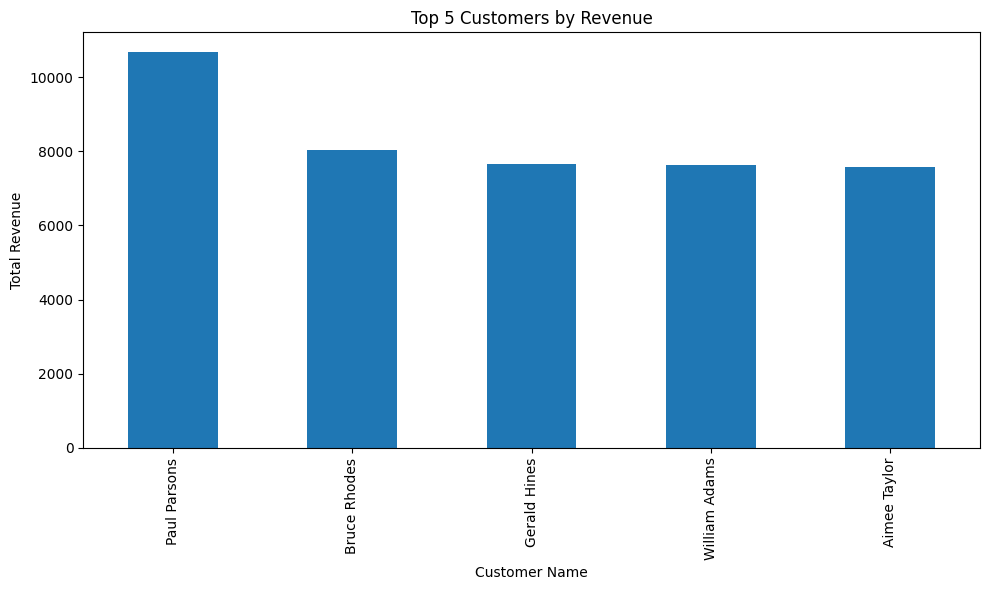

In [25]:

# 1. Top 5 customers by revenue
top_customers.plot(kind='bar', figsize=(10, 6), title='Top 5 Customers by Revenue')
plt.xlabel('Customer Name')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

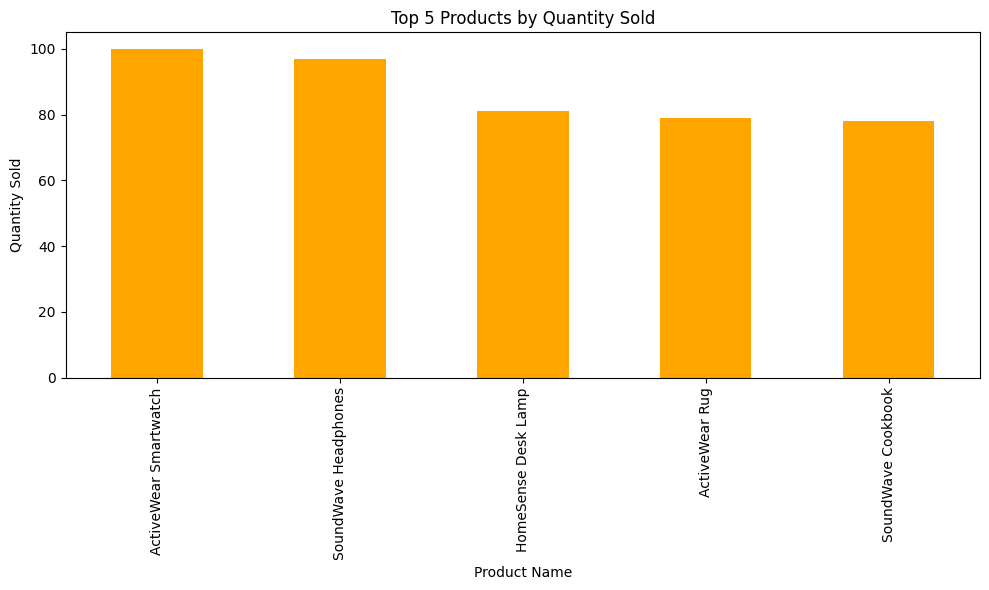

In [26]:
# 2. Top 5 products by quantity sold
top_products.plot(kind='bar', figsize=(10, 6), color='orange', title='Top 5 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()

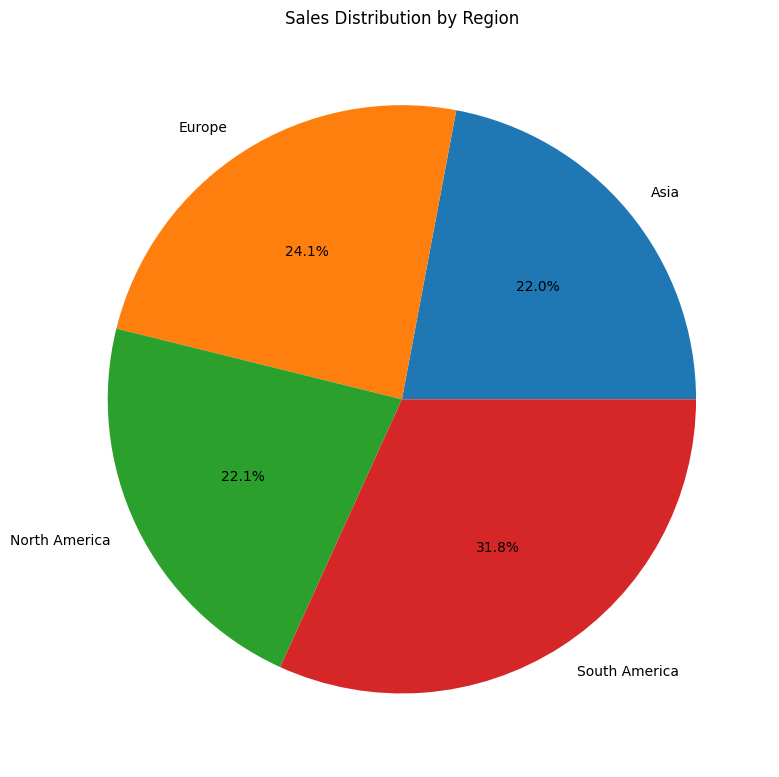

In [27]:
# 3. Sales by region
sales_by_region.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Sales Distribution by Region')
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()


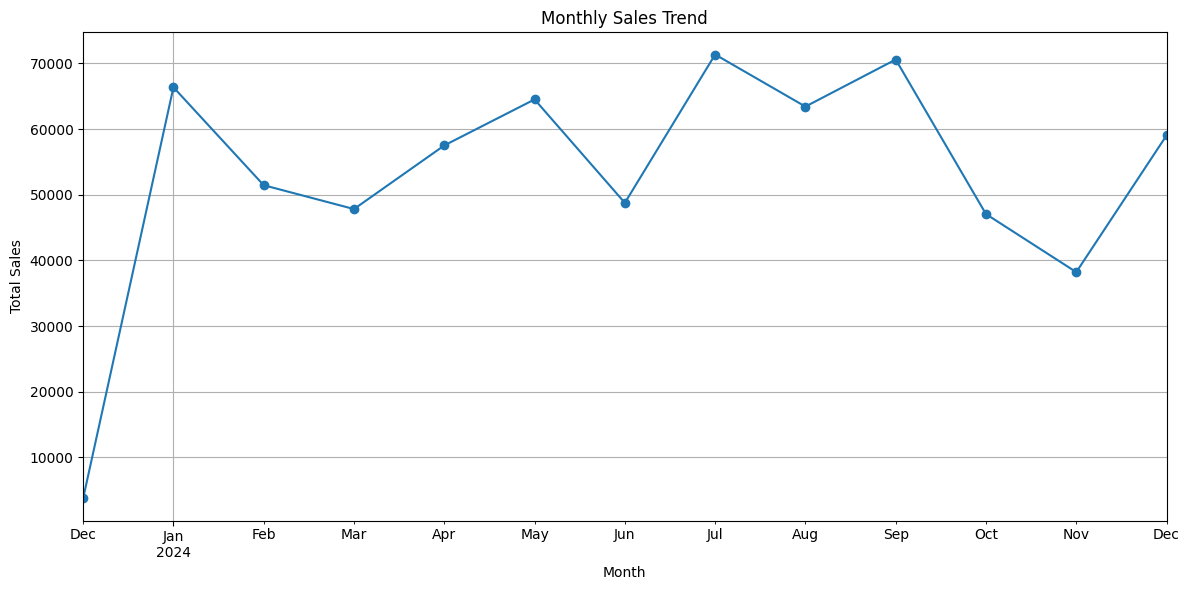

In [28]:
# 4. Monthly sales trends
monthly_sales.plot(kind='line', marker='o', figsize=(12, 6), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

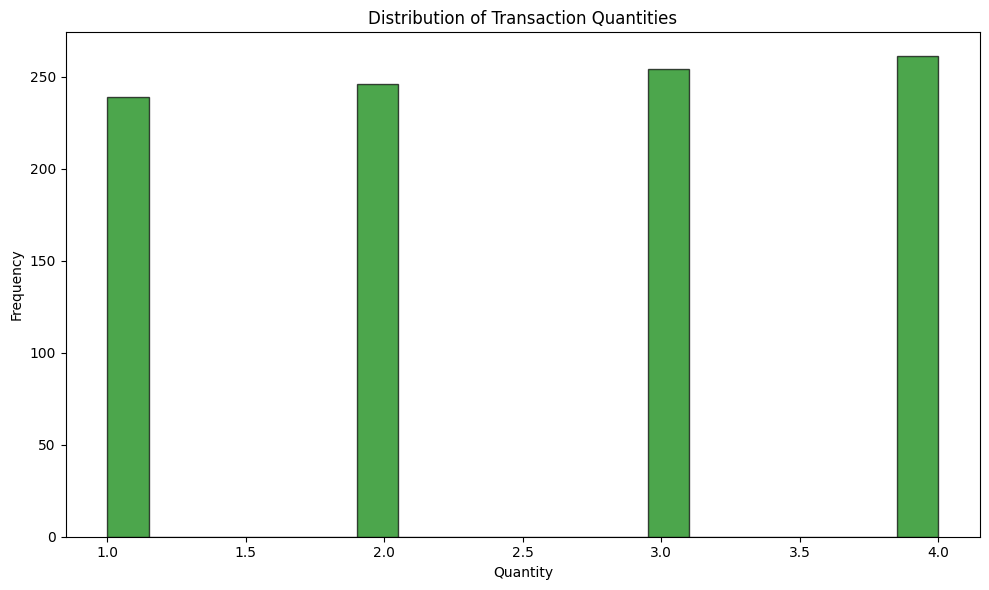

In [29]:
# 5. Transaction quantity distribution
plt.figure(figsize=(10, 6))
plt.hist(merged_data['Quantity'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Transaction Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()